In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [33]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Mengisi Missing Value

<AxesSubplot:xlabel='Age', ylabel='Count'>

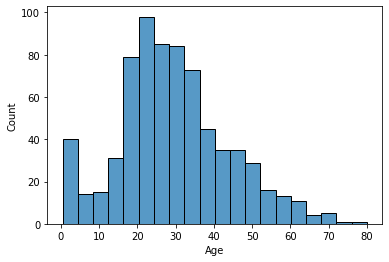

In [35]:
sns.histplot(data = data_train['Age'])

In [36]:
data_train['Age'].mean()

29.69911764705882

In [37]:
data_train['Age'].fillna(value = data_train['Age'].mean(), inplace = True)

In [38]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
data_train['Embarked'].fillna(value = 'S', inplace = True)

In [40]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Menghapus Kolom yang Tidak Digunakan

In [41]:
data_train.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], inplace = True, axis = 'columns')

In [42]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


## Merubah Nilai Kategori Menjadi Numerik

In [43]:
data_train['Sex'].replace(['male','female'], [0,1], inplace = True)

In [44]:
data_train['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)

In [45]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.699118,1,2,0
889,1,1,0,26.000000,0,0,1


## Memisahkan Data Feature dan Data Target

In [46]:
X_train = data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [47]:
Y_train = data_train['Survived']

## Normalisasi atau standarisasi data

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [50]:
X_train

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.56883712],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         1.00518113],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.56883712],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.56883712],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
         1.00518113],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
         2.57919938]])

## Melakukan Modeling data

In [51]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)

In [58]:
df_hasil_train = pd.DataFrame({'Y_pred' : y_pred_train,
                            'Y_train' : Y_train})
df_hasil_train.head()

,Y_pred,Y_train
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [61]:
df_hasil_train['Y_pred'].value_counts()

0    560
1    331
Name: Y_pred, dtype: int64

In [60]:
df_hasil_train['Y_train'].value_counts()

0    549
1    342
Name: Y_train, dtype: int64

In [62]:
model.score(X_train, Y_train)

0.7968574635241302

## prediksi dataset test titanic

In [63]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
data_test['Age'].fillna(value = data_train['Age'].mean(), inplace = True)

In [66]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [67]:
data_test.drop(labels=['Name', 'Ticket', 'Cabin', 'Fare'], inplace = True, axis = 'columns')

In [68]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.500000,0,0,Q
1,893,3,female,47.000000,1,0,S
2,894,2,male,62.000000,0,0,Q
3,895,3,male,27.000000,0,0,S
4,896,3,female,22.000000,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,29.699118,0,0,S
414,1306,1,female,39.000000,0,0,C
415,1307,3,male,38.500000,0,0,S
416,1308,3,male,29.699118,0,0,S


In [69]:
data_test['Sex'].replace(['male','female'], [0,1], inplace = True)

In [70]:
data_test['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)

In [74]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34.5,0,0,2
1,893,3,1,47.0,1,0,0
2,894,2,0,62.0,0,0,2
3,895,3,0,27.0,0,0,0
4,896,3,1,22.0,1,1,0


In [72]:
X_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

KeyError: 'Survived'

In [75]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [76]:
X_test

array([[ 0.87348191, -0.75592895,  0.34428417, -0.49947002, -0.4002477 ,
         2.24316522],
       [ 0.87348191,  1.32287566,  1.33465451,  0.61699237, -0.4002477 ,
        -0.6778412 ],
       [-0.31581919, -0.75592895,  2.52309891, -0.49947002, -0.4002477 ,
         2.24316522],
       ...,
       [ 0.87348191, -0.75592895,  0.66120268, -0.49947002, -0.4002477 ,
        -0.6778412 ],
       [ 0.87348191, -0.75592895, -0.03608795, -0.49947002, -0.4002477 ,
        -0.6778412 ],
       [ 0.87348191, -0.75592895, -0.03608795,  0.61699237,  0.61989583,
         0.78266201]])

In [78]:
y_pred_test = model.predict(X_test)

In [80]:
df_hasil_test = pd.DataFrame({'PassengerId' : data_test['PassengerId'],
                            'Survived' : y_pred_test})
df_hasil_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [81]:
df_hasil_test.to_csv('hasil.csv', index = False)